In [2]:
#Need this location for rest of the project to be located from
import sys
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\iris')
from iris.__init__ import * #TBD(look into why we need thos)
from iris.config import *

In [3]:
#load the dataset
dataset = load_iris()

In [9]:
#Make dataframe from dataset bunch(containing iv, dv as arrays data and feature_names resp)
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df['flower_name '] = df['target'].apply(lambda x:dataset.target_names[x])

In [10]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [14]:
#Lets make dataframe for different flower types
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

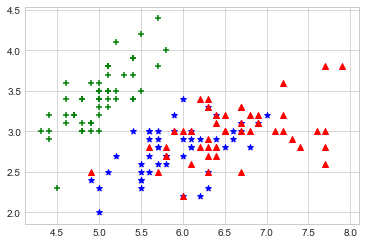

In [28]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='+',color='green')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*',color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='^',color='red')

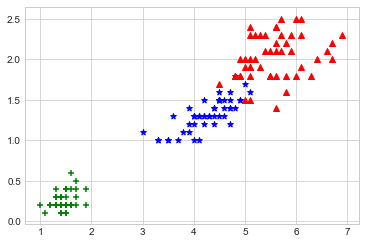

In [29]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='+',color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='*',color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],marker='^',color='red')

In [30]:
print(df.columns)
iv = df.drop(['flower_name ','target'],axis=1)
dv=df['target'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size = 0.2)
model = SVC().fit(iv_train, dv_train)
model

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower_name '],
      dtype='object')


C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
model.score(iv_test,dv_test)

0.9333333333333333

In [37]:
#very high gamma make more error in model prediction
model = SVC(C=100,gamma=100).fit(iv_train, dv_train)
model.score(iv_test,dv_test)

0.5333333333333333

In [40]:
#This gamma make good model prediction
model = SVC(C=1,gamma=10).fit(iv_train, dv_train)
model.score(iv_test,dv_test)

0.9666666666666667